In [4]:
#Import libraries

import pandas as pd
import numpy as np
import csv
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
from io import StringIO
import re
import pprint
from string import punctuation
from __future__ import division

In [5]:
#Open and clean dataset (remove spaces from column headers)

with open('Sjogrens_500.csv', 'rb') as f:
  contents = f.read()

s = str(contents, 'utf-8', errors="ignore")
data = StringIO(s)
df=pd.read_csv(data)
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df = df[['Informational', 'post_text']]   #Edit for 'Informational/Emotional'
df.head()

,Informational,post_text
0,5.0,"Hi everybody!\n\nI write from Galicia, in the ..."
1,5.0,Hello and Welcome Lou.\n\n\nI am sorry to hear...
2,5.0,"Interesting - my ANA was/is high, but SS antib..."
3,3.0,My blood work was not diffinitive. I was DX'd ...
4,5.0,"Lou, \n\nI want to be a support to you as well..."


In [6]:
#More cleaning and formatting column names for model

df = df.dropna()
df = df.rename(columns = {'post_text': 'text','Informational': 'target'})  #Edit for 'Informationl/Emotional'
df.head()

,target,text
0,5.0,"Hi everybody!\n\nI write from Galicia, in the ..."
1,5.0,Hello and Welcome Lou.\n\n\nI am sorry to hear...
2,5.0,"Interesting - my ANA was/is high, but SS antib..."
3,3.0,My blood work was not diffinitive. I was DX'd ...
4,5.0,"Lou, \n\nI want to be a support to you as well..."


In [26]:
#Find the distribution of rating classifications in the dataset
df.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
1.0      116    116  Any suggestions would be welcome please :)\n\n...    1
2.0       39     39  Oops, my experience was with protein, not bloo...    1
3.0       25     25  Since taking plaquenil and being on a gluten f...    1
4.0       87     87  Hi̴_ :)\n\nThyroid problems can also cause puf...    1
5.0      230    230  My neck pain is due to Degenerative Disk Disea...    1

In [27]:
#Null accuracy: accuracy that could be achieved by always predicting the most frequent class
null_accuracy_Informational = (230 / len(df.target)) * 100
print('Null Accuracy: %.2f%%' % (null_accuracy_Informational))

Null Accuracy: 46.28%


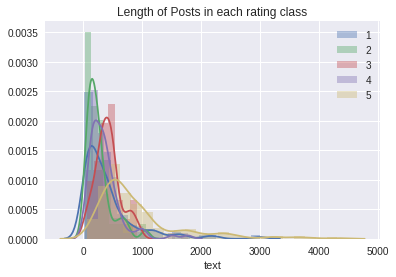

In [28]:
#### Visualize distribution of features in dataset ###

#Length of post (number of characters)
s1 = df[df['target'] == 1]['text'].str.len()
sns.distplot(s1, label='1')
s2 = df[df['target'] == 2]['text'].str.len()
sns.distplot(s2, label='2')
s3 = df[df['target'] == 3]['text'].str.len()
sns.distplot(s3, label='3')
s4 = df[df['target'] == 4]['text'].str.len()
sns.distplot(s4, label='4')
s5 = df[df['target'] == 5]['text'].str.len()
sns.distplot(s5, label='5')

plt.title('Length of Posts in each rating class')
plt.legend()

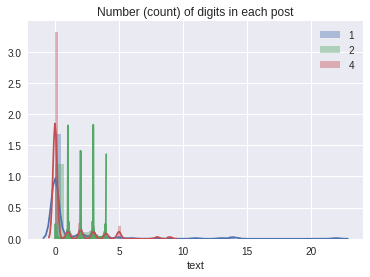

In [29]:
# Number of digits in post
# \d matches a digit, and \D matches anything else

s1 = df[df['target'] == 1]['text'].str.replace(r'\D+', '').str.len()
sns.distplot(s1, label='1')
s2 = df[df['target'] == 2]['text'].str.replace(r'\D+', '').str.len()
sns.distplot(s2, label='2')
#s3 = df[df['target'] == 3]['text'].str.replace(r'\D+', '').str.len()
#sns.distplot(s3, label='3')
s4 = df[df['target'] == 4]['text'].str.replace(r'\D+', '').str.len()
sns.distplot(s4, label='4')
#s5 = df[df['target'] == 5]['text'].str.replace(r'\D+', '').str.len()
#sns.distplot(s5, label='5')

plt.title('Number (count) of digits in each post')
plt.legend()

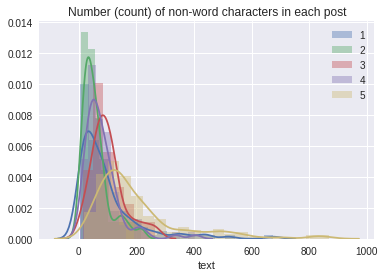

In [30]:
# Matches of non-word characters (anything other than a letter, digit or underscore.)
# \W matches a word characater, \w matches anything else

s1 = df[df['target'] == 1]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s1, label='1')
s2 = df[df['target'] == 2]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s2, label='2')
s3 = df[df['target'] == 3]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s3, label='3')
s4 = df[df['target'] == 4]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s4, label='4')
s5 = df[df['target'] == 5]['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s5, label='5')

plt.title('Number (count) of non-word characters in each post')
plt.legend()

In [31]:
#Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['target'], 
                                                    random_state=0)

In [32]:
'''Vectorize the 'text' input--ie, each word in the training set corpus becomes a feature, and each post  
is represented as a vector with an integer count for each word. aka Document Term Matrix.
Sticking with just this matrix as an input for the model is a "Bag of Words" approach.'''


from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df = 4, stop_words="english", ngram_range=(1,3)).fit(X_train)
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

Vocabulary len: 1050
Longest word: connective tissue disease


In [33]:
#Train the model with training set
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [34]:
#Run model to predict ratings on the test set (which has to also be vectorized to a sparse matrix). Find Accuracy
from sklearn.metrics import accuracy_score

y_pred = model.predict(vect.transform(X_test))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 62.40%


Try these additional features:

1. the length of document (number of characters)
2. number of digits per document
3. number of non-word characters (anything other than a letter, digit or underscore.)

In [39]:
#Play around with tfidf parameters, but min document frequency of 3 seems to be best (no n-grams)
vect = TfidfVectorizer(min_df = 3).fit(X_train)

In [37]:
#Function to add features: Returns a sparse feature matrix with the added feature.

def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [40]:
#Play around with these features, to get best accuracy (all seem to help)

X_train_vectorized = vect.transform(X_train)

X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\D+', '').str.len())
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\w+', '').str.len())

In [41]:
#Fit the model

model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [42]:
#Add the same features to the test set

X_test_vectorized = vect.transform(X_test)

X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())

In [43]:
#Calcuate accuracy 

y_pred = model.predict(X_test_vectorized)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 64.00%


In [44]:
#description of inputs
X_test_vectorized

<125x1547 sparse matrix of type '<class 'numpy.float64'>'
	with 7785 stored elements in Compressed Sparse Row format>

In [45]:
# predicted values
y_pred

array([ 5.,  1.,  1.,  5.,  5.,  5.,  2.,  5.,  5.,  5.,  5.,  1.,  5.,
        5.,  4.,  5.,  4.,  5.,  5.,  5.,  1.,  4.,  5.,  4.,  1.,  1.,
        5.,  4.,  5.,  1.,  5.,  5.,  1.,  5.,  1.,  5.,  3.,  5.,  5.,
        1.,  5.,  5.,  5.,  1.,  5.,  5.,  1.,  5.,  5.,  5.,  5.,  4.,
        5.,  1.,  4.,  5.,  1.,  1.,  5.,  1.,  5.,  1.,  5.,  5.,  5.,
        5.,  1.,  5.,  1.,  1.,  1.,  4.,  1.,  1.,  3.,  5.,  1.,  5.,
        5.,  1.,  5.,  1.,  1.,  3.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  4.,  5.,  5.,  4.,  5.,  5.,  5.,  1.,  5.,  4.,  4.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  1.,  5.,  5.,  1.,  5.,  5.,  5.,
        5.,  1.,  5.,  5.,  1.,  5.,  5.,  4.])

In [46]:
#actual values
y_test

90     5.0
255    1.0
284    5.0
446    5.0
337    5.0
15     1.0
317    2.0
489    5.0
159    5.0
153    5.0
242    4.0
251    1.0
429    5.0
290    5.0
171    2.0
328    5.0
468    3.0
354    5.0
154    5.0
37     5.0
205    1.0
365    2.0
241    5.0
108    4.0
45     1.0
439    2.0
21     5.0
366    2.0
96     5.0
234    1.0
      ... 
394    2.0
56     5.0
441    4.0
60     5.0
208    4.0
107    4.0
400    4.0
71     2.0
474    4.0
6      1.0
413    5.0
113    5.0
237    5.0
300    5.0
155    5.0
273    1.0
7      5.0
137    5.0
8      1.0
432    4.0
433    5.0
367    4.0
285    5.0
210    1.0
188    5.0
431    4.0
49     2.0
134    4.0
364    5.0
411    4.0
Name: target, Length: 125, dtype: float64